In [37]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

Assuming the arrays are examples of the User data in any order of what questions have been answered (either binary or answered)

In [38]:
X = np.array([[1, 1, 2], [2, 2, 5], [3, 3, 6], [4, 8, 7], [5, 8, 8], [6, 7, 3]])

Clustering using optics will take the minimum number of samples in an OPTICS cluster. 

In [39]:
clustering = OPTICS(min_samples=2).fit(X)

The cluster labels for each point in the dataset given to fit(). The points not included in the clustering fit will be labeled as -1. 

In [40]:
clustering.labels_

array([0, 0, 0, 1, 1, 1])

In [41]:
bloopening = OPTICS(min_samples=2).fit_predict(X)

Generates sample data for the graphcs

In [65]:
np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

cluster = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

Start to run on the fit of the OPTICS cluster

In [71]:
# Run the fit
cluster.fit(X)

labels_050 = cluster_optics_dbscan(reachability=cluster.reachability_,
                                   core_distances=cluster.core_distances_,
                                   ordering=cluster.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=cluster.reachability_,
                                   core_distances=cluster.core_distances_,
                                   ordering=cluster.ordering_, eps=2)

space = np.arange(len(X))
reachability = cluster.reachability_[cluster.ordering_]
labels = cluster.labels_[cluster.ordering_]

Plotting the reachability plot based on randomized sample data

Text(0.5, 1.0, 'Reachability Plot')

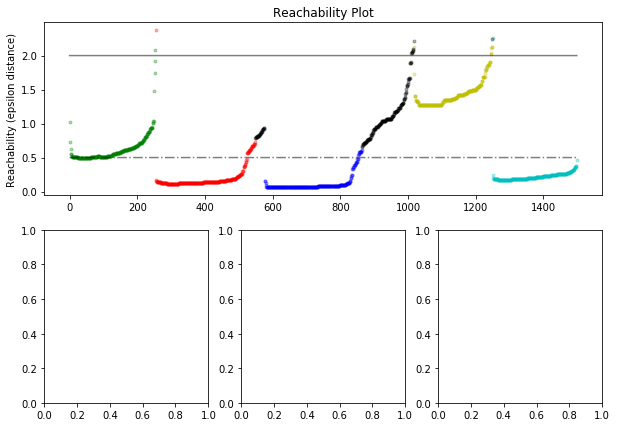

In [72]:
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])
# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')


In [ ]:
Plot based on automatic clustering,

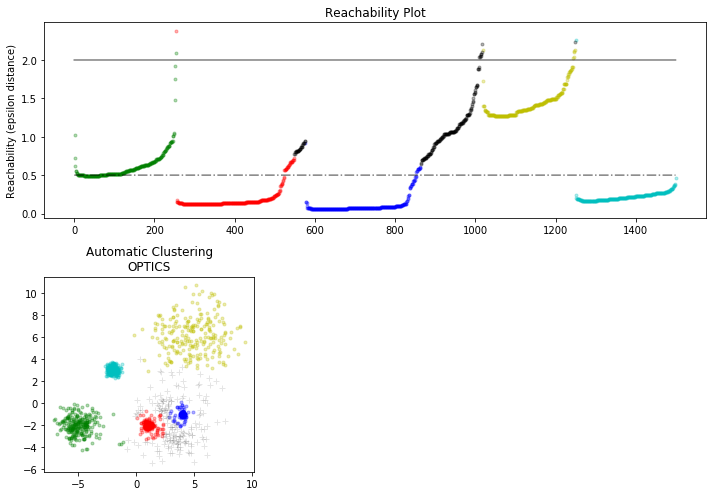

In [74]:
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])


# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[cluster.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[cluster.labels_ == -1, 0], X[cluster.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')
plt.tight_layout()
plt.show()